# Regionalization analysis

Notebook for testing regionalization analysis in hexagons with proximity data, used to determine certain urban areas with specific clustering structures based on opportunities.

## Import libraries

In [1]:
import odc

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox

from esda.moran import Moran
from libpysal.weights import Queen, KNN

import matplotlib.pyplot as plt
import seaborn as sns

import aup

## Add data

Hexagon data with proximity information

In [2]:
schema = 'projects_research'
table = 'santiago_hexproximity_4_5_kmh'
res = 9

query = f'SELECT * FROM {schema}.{table} WHERE "res" = {res}'

hex_gdf = aup.gdf_from_query(query)
print(hex_gdf.shape)
hex_gdf.head(2)

(30073, 120)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,ep_plaza_big_time,ep_plaza_big_count_15min,ciclovias_time,ciclovias_count_15min,eleam_time,eleam_count_15min,estaciones_bicicletas_time,estaciones_bicicletas_count_15min,res,city
0,89b2c0b0527ffff,"POLYGON ((-70.97775 -33.70795, -70.97893 -33.7...",0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,9,Santiago
1,89b2c0b2c2bffff,"POLYGON ((-70.9384 -33.68752, -70.93957 -33.68...",49.861481,0.0,40.652562,0.0,47.770959,0.0,476.078152,0.0,...,31.64528,0.0,26.948693,0.0,89.707067,0.0,229.39575,0.0,9,Santiago


In [3]:
hex_gdf = hex_gdf.loc[hex_gdf.supermercado_time!=0]

<Axes: >

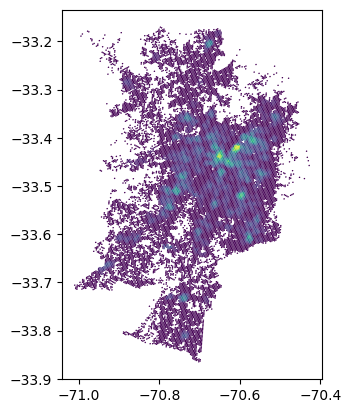

In [4]:
hex_gdf.plot('supermercado_count_15min')

## Clustering analysis

Define variables

In [5]:
cluster_variables = []

for c in hex_gdf.columns:
    if 'count_15min' in c:
        cluster_variables.append(c)

len(cluster_variables)

58

Create weight matrix

In [6]:
w = Queen.from_dataframe(hex_gdf, use_index=False)

/home/edgaregurrola/.cache/pypoetry/virtualenvs/aup-qDsIK5d5-py3.13/lib/python3.13/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 368 disconnected components.
 There are 229 islands with ids: 101, 128, 129, 161, 205, 208, 259, 306, 333, 340, 341, 413, 421, 423, 545, 553, 555, 556, 557, 568, 579, 586, 646, 650, 651, 657, 721, 722, 723, 726, 731, 732, 733, 734, 741, 742, 743, 744, 895, 896, 1063, 1076, 1718, 1723, 1724, 1780, 1819, 1828, 1876, 1877, 1879, 1881, 1952, 1953, 1956, 1957, 1990, 2622, 2623, 2855, 2918, 2920, 2969, 3199, 3200, 3207, 3254, 3260, 3617, 3648, 3700, 3739, 3743, 3748, 3774, 3888, 3891, 3892, 3894, 3922, 4107, 4108, 4109, 4120, 4135, 4165, 4206, 4383, 5118, 5341, 5352, 5362, 5363, 5444, 5567, 5606, 5607, 5817, 6791, 6799, 6800, 6807, 6812, 7062, 7139, 7140, 7153, 7199, 7211, 7224, 7230, 7255, 7350, 7351, 7437, 7630, 8297, 8339, 8340, 8349, 8561, 8616, 8619, 8697, 8711, 8851, 8918, 8937, 8940, 900

Moran's I analysis - Spatial autocorrelation

In [7]:
# Set seed for reproducibility
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [
    Moran(hex_gdf[variable], w) for variable in cluster_variables
]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim)
    for variable, res in zip(cluster_variables, mi_results)
]
# Display on table
table = pd.DataFrame(
    mi_results, columns=["Variable", "Moran's I", "P-value"]
).set_index("Variable")
table

('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 205, ' is an island (no neighbors)')
('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 259, ' is an island (no neighbors)')
('WARNING: ', 306, ' is an island (no neighbors)')
('WARNING: ', 333, ' is an island (no neighbors)')
('WARNING: ', 340, ' is an island (no neighbors)')
('WARNING: ', 341, ' is an island (no neighbors)')
('WARNING: ', 413, ' is an island (no neighbors)')
('WARNING: ', 421, ' is an island (no neighbors)')
('WARNING: ', 423, ' is an island (no neighbors)')
('WARNING: ', 545, ' is an island (no neighbors)')
('WARNING: ', 553, ' is an island (no neighbors)')
('WARNING: ', 555, ' is an island (no neighbors)')
('WARNING: ', 556, ' is an island (no neighbors)')
('WARNING: ', 557, ' is an island (no neighbors)')
('WARNING: ', 568, ' is an isla

,Moran's I,P-value
Variable,,
supermercado_count_15min,0.921666,0.001
clinica_priv_count_15min,0.938950,0.001
clinica_pub_count_15min,0.875534,0.001
hospital_priv_count_15min,0.866104,0.001
hospital_pub_count_15min,0.875588,0.001
consult_ado_priv_count_15min,0.926676,0.001
consult_ado_pub_count_15min,0.799554,0.001
club_deportivo_count_15min,0.885769,0.001
eq_deportivo_pub_count_15min,0.958528,0.001


In [8]:
_ = sns.pairplot(
    hex_gdf[cluster_variables], kind="reg", diag_kind="kde"
)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fed82b218a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fed75ca4fe0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Distance metrics

In [9]:
from sklearn import metrics

In [10]:
metrics.pairwise_distances(
    hex_gdf[["estaciones_bicicletas_count_15min", "restaurantes_bar_cafe_count_15min"]].head()
).round(4)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### Scale data

In [11]:
from sklearn.preprocessing import robust_scale

In [12]:
hex_scaled = robust_scale(hex_gdf[cluster_variables])

### Spatial contiguous cluster

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=15
)
# Fit algorithm to the data
model.fit(hex_scaled)

/home/edgaregurrola/.cache/pypoetry/virtualenvs/aup-qDsIK5d5-py3.13/lib64/python3.13/site-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 368 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 84040 stored elements and shape (16915, 16915)>,
                        n_clusters=15)

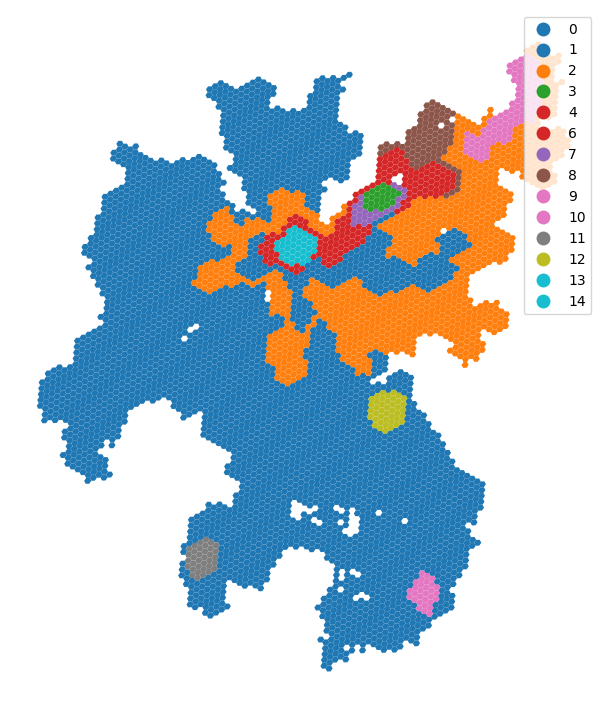

In [21]:
hex_gdf["ward5wq"] = model.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
hex_gdf.loc[hex_gdf.ward5wq!=5].plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

Filter data for consolidated area

In [27]:
w = Queen.from_dataframe(hex_gdf.loc[hex_gdf.ward5wq!=5], use_index=False)
hex_scaled = robust_scale(hex_gdf.loc[hex_gdf.ward5wq!=5][cluster_variables])

# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=25
)
# Fit algorithm to the data
model.fit(hex_scaled)

AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31032 stored elements and shape (5428, 5428)>,
                        n_clusters=25)

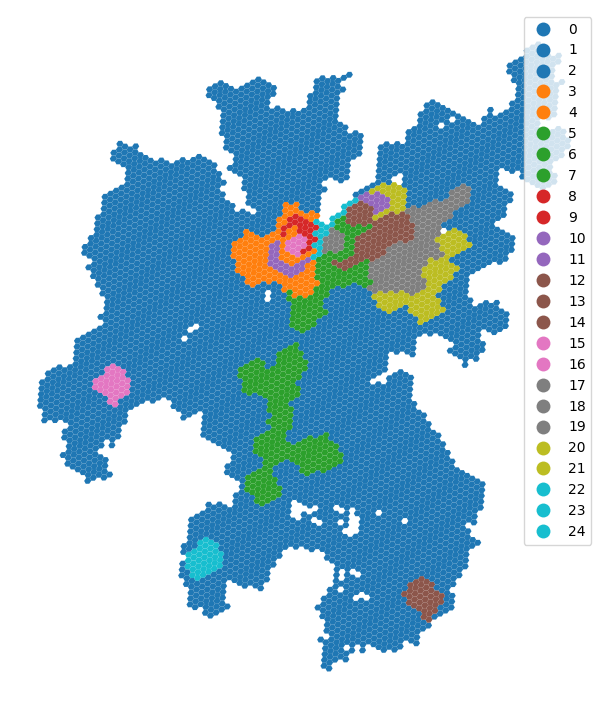

In [28]:
hex_plot = hex_gdf.loc[hex_gdf.ward5wq!=5]
hex_plot = hex_plot[['hex_id','geometry']]
hex_plot["ward5wq"] = model.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
hex_plot.plot(
column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()